# Australian Rain Fall Analysis and Prediction using Machine Learning

## Machine Learning Approach

### Algorithms to be Used:
- **K-Nearest Neighbors (KNN)**
- **Decision Trees**
- **Logistic Regression**
- **Support Vector Machines (SVM)**
- **Random Forest**
- **Gradient Boosting**


### Model Evaluation Metrics:
- **Accuracy Score**
- **Classification Report**
- **Confusion Matrix**
- **ROC Curve**

---

## Dataset Description

### Source
Australian Government's Bureau of Meteorology  
Latest data: [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/)

### Feature Description

| Field | Description | Unit | Data Type |
|-------|-------------|------|-----------|
| **Date** | Date of the Observation | YYYY-MM-DD | `object` |
| **Location** | Location of the Observation | Location | `object` |
| **MinTemp** | Minimum temperature | Celsius | `float` |
| **MaxTemp** | Maximum temperature | Celsius | `float` |
| **Rainfall** | Amount of rainfall | Millimeters | `float` |
| **Evaporation** | Amount of evaporation | Millimeters | `float` |
| **Sunshine** | Amount of bright sunshine | hours | `float` |
| **WindGustDir** | Direction of the strongest gust | Compass Points | `object` |
| **WindGustSpeed** | Speed of the strongest gust | Kilometers/Hour | `object` |
| **WindDir9am** | Wind direction averaged of 10 minutes prior to 9am | Compass Points | `object` |
| **WindDir3pm** | Wind direction averaged of 10 minutes prior to 3pm | Compass Points | `object` |
| **WindSpeed9am** | Wind speed averaged of 10 minutes prior to 9am | Kilometers/Hour | `float` |
| **WindSpeed3pm** | Wind speed averaged of 10 minutes prior to 3pm | Kilometers/Hour | `float` |
| **Humidity9am** | Humidity at 9am | Percent | `float` |
| **Humidity3pm** | Humidity at 3pm | Percent | `float` |
| **Pressure9am** | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal | `float` |
| **Pressure3pm** | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal | `float` |
| **Cloud9am** | Fraction of the sky obscured by cloud at 9am | Eights | `float` |
| **Cloud3pm** | Fraction of the sky obscured by cloud at 3pm | Eights | `float` |
| **Temp9am** | Temperature at 9am | Celsius | `float` |
| **Temp3pm** | Temperature at 3pm | Celsius | `float` |
| **RainToday** | If there was rain today | Yes/No | `object` |
| **RISK_MM** | Amount of rain tomorrow | Millimeters | `float` |
| **RainTomorrow** | If there is rain tomorrow (Target Variable) | Yes/No | `float` |

### Target Variable
- **RainTomorrow**: Binary classification (Yes/No) predicting whether it will rain tomorrow

### Importing Libraries

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_score, recall_score, f1_score
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import joblib

### Loading Dataset

In [159]:
url = "https://raw.githubusercontent.com/masterArnob/IBM-Machine-Learning-with-Python/refs/heads/main/Final%20Project/Australia_Weather_Data.csv"
df = pd.read_csv(url)
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Step 1: Data Preprocessing / Data Cleaning

In [160]:
df.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [161]:
df.columns = df.columns.str.lower()
df.columns

Index(['date', 'mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           3271 non-null   object 
 1   mintemp        3271 non-null   float64
 2   maxtemp        3271 non-null   float64
 3   rainfall       3271 non-null   float64
 4   evaporation    3271 non-null   float64
 5   sunshine       3271 non-null   float64
 6   windgustdir    3271 non-null   object 
 7   windgustspeed  3271 non-null   int64  
 8   winddir9am     3271 non-null   object 
 9   winddir3pm     3271 non-null   object 
 10  windspeed9am   3271 non-null   int64  
 11  windspeed3pm   3271 non-null   int64  
 12  humidity9am    3271 non-null   int64  
 13  humidity3pm    3271 non-null   int64  
 14  pressure9am    3271 non-null   float64
 15  pressure3pm    3271 non-null   float64
 16  cloud9am       3271 non-null   int64  
 17  cloud3pm       3271 non-null   int64  
 18  temp9am 

In [163]:
df.dtypes

date              object
mintemp          float64
maxtemp          float64
rainfall         float64
evaporation      float64
sunshine         float64
windgustdir       object
windgustspeed      int64
winddir9am        object
winddir3pm        object
windspeed9am       int64
windspeed3pm       int64
humidity9am        int64
humidity3pm        int64
pressure9am      float64
pressure3pm      float64
cloud9am           int64
cloud3pm           int64
temp9am          float64
temp3pm          float64
raintoday         object
raintomorrow      object
dtype: object

In [164]:
df.isnull().sum()

date             0
mintemp          0
maxtemp          0
rainfall         0
evaporation      0
sunshine         0
windgustdir      0
windgustspeed    0
winddir9am       0
winddir3pm       0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
cloud9am         0
cloud3pm         0
temp9am          0
temp3pm          0
raintoday        0
raintomorrow     0
dtype: int64

In [165]:
categories = df.select_dtypes(include=["object"]).columns
print("Object types columns: ", categories)

Object types columns:  Index(['date', 'windgustdir', 'winddir9am', 'winddir3pm', 'raintoday',
       'raintomorrow'],
      dtype='object')


In [166]:
numbers = df.select_dtypes(include=["int64", "float64"]).columns
print("numbers types columns: ", numbers)

numbers types columns:  Index(['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'windgustspeed', 'windspeed9am', 'windspeed3pm', 'humidity9am',
       'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm',
       'temp9am', 'temp3pm'],
      dtype='object')


In [167]:
le = LabelEncoder()
for col in categories:
    df[col] = le.fit_transform(df[col])
df.head()

,date,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,1036,19.5,22.4,15.6,6.2,0.0,13,41,8,11,...,92,84,1017.6,1017.4,8,8,20.7,20.9,1,1
1,1135,19.5,25.6,6.0,3.4,2.7,13,41,13,0,...,83,73,1017.9,1016.4,7,7,22.4,24.8,1,1
2,1228,21.6,24.5,6.6,2.4,0.1,13,41,2,2,...,88,86,1016.7,1015.6,7,8,23.5,23.0,1,1
3,1237,20.2,22.8,18.8,2.2,0.0,13,41,5,0,...,83,90,1014.2,1011.8,8,8,21.4,20.9,1,1
4,1246,19.7,25.7,77.4,4.8,0.0,13,41,5,13,...,88,74,1008.3,1004.8,8,8,22.5,25.5,1,1


In [168]:
df.describe()

,date,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,...,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,1635.000000,14.877102,23.005564,3.342158,5.175787,7.168970,9.532559,41.476307,10.184959,5.821461,...,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093,17.821461,21.543656,0.259554,0.259554
std,944.400692,4.554710,4.483752,9.917746,2.757684,3.815966,4.595180,10.806951,4.425361,4.993321,...,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274,4.894316,4.297053,0.438457,0.438457
min,0.000000,4.300000,11.700000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,...,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,817.500000,11.000000,19.600000,0.000000,3.200000,4.250000,5.000000,35.000000,8.000000,1.000000,...,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,1635.000000,14.900000,22.800000,0.000000,4.800000,8.300000,13.000000,41.000000,13.000000,4.000000,...,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000,0.000000,0.000000
75%,2452.500000,18.800000,26.000000,1.400000,7.000000,10.200000,13.000000,44.000000,13.000000,10.000000,...,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,3270.000000,27.600000,45.800000,119.400000,18.400000,13.600000,15.000000,96.000000,15.000000,15.000000,...,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000


In [169]:
df.head()

,date,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,1036,19.5,22.4,15.6,6.2,0.0,13,41,8,11,...,92,84,1017.6,1017.4,8,8,20.7,20.9,1,1
1,1135,19.5,25.6,6.0,3.4,2.7,13,41,13,0,...,83,73,1017.9,1016.4,7,7,22.4,24.8,1,1
2,1228,21.6,24.5,6.6,2.4,0.1,13,41,2,2,...,88,86,1016.7,1015.6,7,8,23.5,23.0,1,1
3,1237,20.2,22.8,18.8,2.2,0.0,13,41,5,0,...,83,90,1014.2,1011.8,8,8,21.4,20.9,1,1
4,1246,19.7,25.7,77.4,4.8,0.0,13,41,5,13,...,88,74,1008.3,1004.8,8,8,22.5,25.5,1,1


In [170]:
df = df.drop("date", axis=1)
df.head()

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,19.5,22.4,15.6,6.2,0.0,13,41,8,11,17,...,92,84,1017.6,1017.4,8,8,20.7,20.9,1,1
1,19.5,25.6,6.0,3.4,2.7,13,41,13,0,9,...,83,73,1017.9,1016.4,7,7,22.4,24.8,1,1
2,21.6,24.5,6.6,2.4,0.1,13,41,2,2,17,...,88,86,1016.7,1015.6,7,8,23.5,23.0,1,1
3,20.2,22.8,18.8,2.2,0.0,13,41,5,0,22,...,83,90,1014.2,1011.8,8,8,21.4,20.9,1,1
4,19.7,25.7,77.4,4.8,0.0,13,41,5,13,11,...,88,74,1008.3,1004.8,8,8,22.5,25.5,1,1


In [171]:
df.dtypes

mintemp          float64
maxtemp          float64
rainfall         float64
evaporation      float64
sunshine         float64
windgustdir        int64
windgustspeed      int64
winddir9am         int64
winddir3pm         int64
windspeed9am       int64
windspeed3pm       int64
humidity9am        int64
humidity3pm        int64
pressure9am      float64
pressure3pm      float64
cloud9am           int64
cloud3pm           int64
temp9am          float64
temp3pm          float64
raintoday          int64
raintomorrow       int64
dtype: object

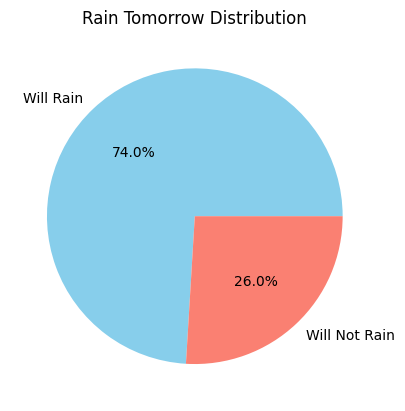

In [172]:
plt.pie(df["raintomorrow"].value_counts(), labels=["Will Rain", "Will Not Rain"], autopct="%1.1f%%", colors=["skyblue", "salmon"])
plt.title("Rain Tomorrow Distribution")
plt.show()

### Step 2: Feature Selection

In [173]:
df.corr()

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
mintemp,1.000000,0.771005,0.013995,0.569316,-0.063475,-0.330315,0.127792,-0.482391,-0.299649,-0.298040,...,0.053946,0.273269,-0.391654,-0.353334,0.241248,0.164028,0.939307,0.753147,0.020618,0.082804
maxtemp,0.771005,1.000000,-0.139306,0.510334,0.327422,-0.256924,0.073184,-0.315252,-0.297641,-0.349382,...,-0.185382,-0.150741,-0.385853,-0.420375,-0.084695,-0.099217,0.858639,0.960805,-0.184585,-0.152525
rainfall,0.013995,-0.139306,1.000000,-0.110343,-0.308962,-0.032629,0.149811,-0.027301,0.079288,0.153696,...,0.332636,0.305635,-0.037561,0.001780,0.245231,0.200999,-0.054297,-0.142748,0.556535,0.296120
evaporation,0.569316,0.510334,-0.110343,1.000000,0.175932,-0.156052,0.245426,-0.310524,-0.116784,-0.077532,...,-0.395651,-0.102295,-0.343581,-0.298303,-0.037051,-0.038422,0.606122,0.474599,-0.231937,-0.070145
sunshine,-0.063475,0.327422,-0.308962,0.175932,1.000000,-0.027547,-0.029032,0.100739,-0.116987,-0.058410,...,-0.490631,-0.586476,-0.047789,-0.094507,-0.665014,-0.677861,0.113891,0.345528,-0.367592,-0.529112
windgustdir,-0.330315,-0.256924,-0.032629,-0.156052,-0.027547,1.000000,0.121045,0.265590,0.368542,0.225957,...,-0.078584,-0.201409,-0.041478,-0.014565,-0.098944,-0.008466,-0.349755,-0.253919,0.005443,0.004532
windgustspeed,0.127792,0.073184,0.149811,0.245426,-0.029032,0.121045,1.000000,-0.178021,0.307015,0.256460,...,-0.225613,-0.095037,-0.408876,-0.351850,0.024275,0.044016,0.159570,0.036216,0.082198,0.145382
winddir9am,-0.482391,-0.315252,-0.027301,-0.310524,0.100739,0.265590,-0.178021,1.000000,0.207894,0.143278,...,0.022681,-0.179873,0.203869,0.217366,-0.198259,-0.131588,-0.498836,-0.321482,-0.011352,-0.080385
winddir3pm,-0.299649,-0.297641,0.079288,-0.116784,-0.116987,0.368542,0.307015,0.207894,1.000000,0.368603,...,-0.151568,-0.257556,-0.179110,-0.101443,-0.032743,0.045892,-0.320257,-0.286418,0.089896,0.100092
windspeed9am,-0.298040,-0.349382,0.153696,-0.077532,-0.058410,0.225957,0.256460,0.143278,0.368603,1.000000,...,-0.189763,-0.148849,0.003737,0.091878,-0.062441,-0.018030,-0.334084,-0.351836,0.143042,0.065510


In [174]:
feature_selection = df.corr()["raintomorrow"].sort_values(ascending = False)
feature_selection

raintomorrow     1.000000
humidity3pm      0.477580
cloud3pm         0.415801
raintoday        0.346207
cloud9am         0.338545
humidity9am      0.335966
rainfall         0.296120
windgustspeed    0.145382
winddir3pm       0.100092
mintemp          0.082804
windspeed9am     0.065510
pressure3pm      0.007827
windgustdir      0.004532
temp9am          0.000125
windspeed3pm    -0.013658
pressure9am     -0.034140
evaporation     -0.070145
winddir9am      -0.080385
maxtemp         -0.152525
temp3pm         -0.190583
sunshine        -0.529112
Name: raintomorrow, dtype: float64

In [175]:
df = df.drop([
"mintemp",
"maxtemp",
"evaporation",
"windgustdir",
"windgustspeed",
"winddir3pm",
"winddir9am",
"windspeed3pm",
"pressure9am",
"pressure3pm",
"temp9am",
"temp3pm"
], axis=1)

df.head()

,rainfall,sunshine,windspeed9am,humidity9am,humidity3pm,cloud9am,cloud3pm,raintoday,raintomorrow
0,15.6,0.0,17,92,84,8,8,1,1
1,6.0,2.7,9,83,73,7,7,1,1
2,6.6,0.1,17,88,86,7,8,1,1
3,18.8,0.0,22,83,90,8,8,1,1
4,77.4,0.0,11,88,74,8,8,1,1


In [176]:
df["raintomorrow"].value_counts()

raintomorrow
0    2422
1     849
Name: count, dtype: int64

In [177]:
X = df.drop("raintomorrow", axis=1)
y = df["raintomorrow"]
X

,rainfall,sunshine,windspeed9am,humidity9am,humidity3pm,cloud9am,cloud3pm,raintoday
0,15.6,0.0,17,92,84,8,8,1
1,6.0,2.7,9,83,73,7,7,1
2,6.6,0.1,17,88,86,7,8,1
3,18.8,0.0,22,83,90,8,8,1
4,77.4,0.0,11,88,74,8,8,1
...,...,...,...,...,...,...,...,...
3266,0.0,7.8,22,73,52,2,2,0
3267,0.0,9.2,20,78,53,2,2,0
3268,0.0,2.7,15,85,56,6,6,0
3269,0.0,9.3,17,56,35,5,2,0


In [178]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.23613927, -1.87896481,  0.27304105, ...,  1.45711035,
         1.58608764,  1.6890139 ],
       [ 0.26802944, -1.17130316, -0.86287917, ...,  1.06131165,
         1.17130569,  1.6890139 ],
       [ 0.3285363 , -1.85275512,  0.27304105, ...,  1.06131165,
         1.58608764,  1.6890139 ],
       ...,
       [-0.33703921, -1.17130316, -0.01093901, ...,  0.66551295,
         0.75652374, -0.59206144],
       [-0.33703921,  0.55853645,  0.27304105, ...,  0.26971425,
        -0.90260408, -0.59206144],
       [-0.33703921,  0.58474614, -0.29491906, ..., -1.31348055,
        -1.31738604, -0.59206144]], shape=(3271, 8))

### Step 2: Spliting The data 80/20

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3 & 4: Algorithm Pipeline

In [180]:
#### Result function for showing the result
def show_result(model_name, model, y_test, y_pred):
    print(f"\n===== {model_name} =====\n")
    accuracy = accuracy_score(y_test, y_pred) * 100
    cr = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred) 
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.2f}% \n")
    print(f"Precision: {precision}\n")
    print(f"Recall: {recall}\n")
    print(f"F1 Score: {f1}\n")
    
    print(f"Classification Report: \n{cr}\n")
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Will Rain", "Will Not Rain"])
    display.plot(cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()
    
    
    # ROC Curve
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.2f}")
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.title(f"{model_name} - ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
        plt.show()
    else:
        print(f"{model_name} does not support ROC curve (no predict_proba).")


In [181]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors = 4) ,
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', probability=True),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier()
}


===== Logistic Regression =====

Accuracy: 81.37% 

Precision: 0.7175572519083969

Recall: 0.5251396648044693

F1 Score: 0.6064516129032258

Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       476
           1       0.72      0.53      0.61       179

    accuracy                           0.81       655
   macro avg       0.78      0.72      0.74       655
weighted avg       0.80      0.81      0.80       655




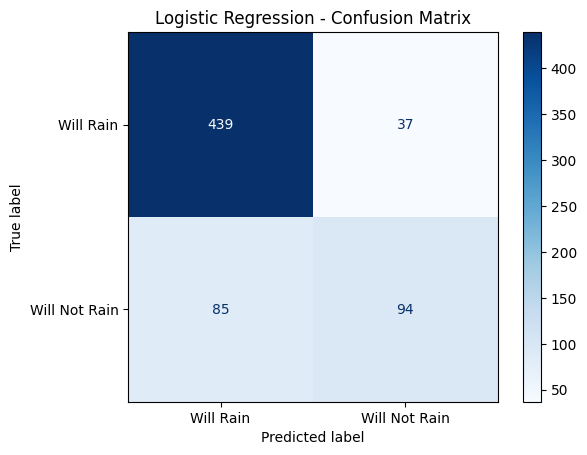

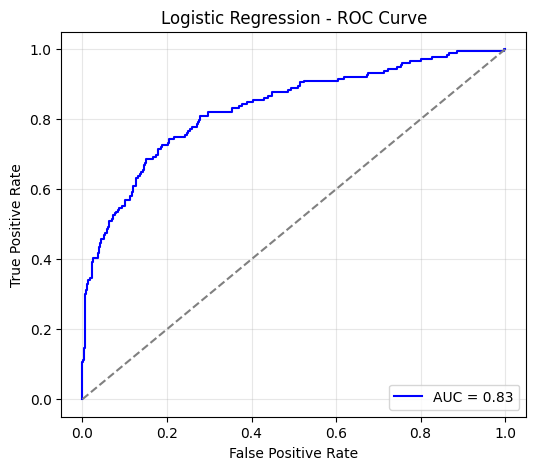


===== KNN =====

Accuracy: 79.85% 

Precision: 0.7326732673267327

Recall: 0.4134078212290503

F1 Score: 0.5285714285714286

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       476
           1       0.73      0.41      0.53       179

    accuracy                           0.80       655
   macro avg       0.77      0.68      0.70       655
weighted avg       0.79      0.80      0.78       655




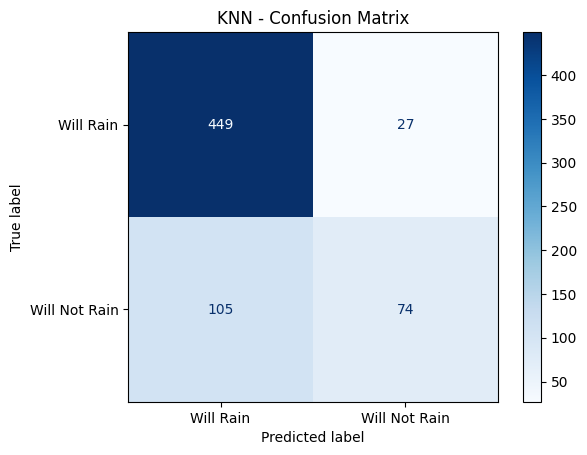

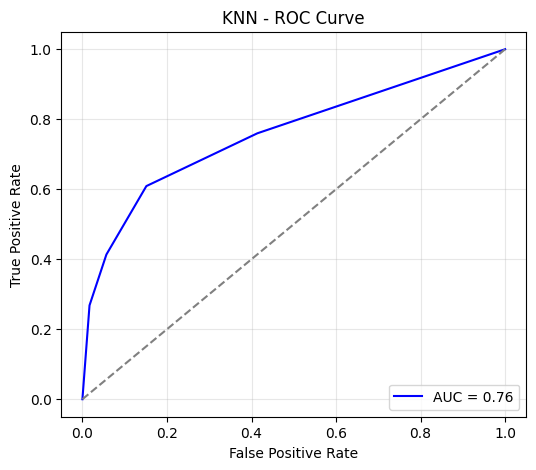


===== Decision Tree =====

Accuracy: 74.20% 

Precision: 0.5290697674418605

Recall: 0.5083798882681564

F1 Score: 0.5185185185185185

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       476
           1       0.53      0.51      0.52       179

    accuracy                           0.74       655
   macro avg       0.67      0.67      0.67       655
weighted avg       0.74      0.74      0.74       655




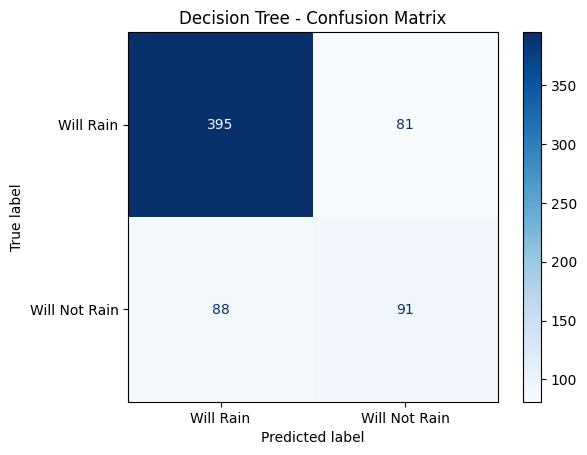

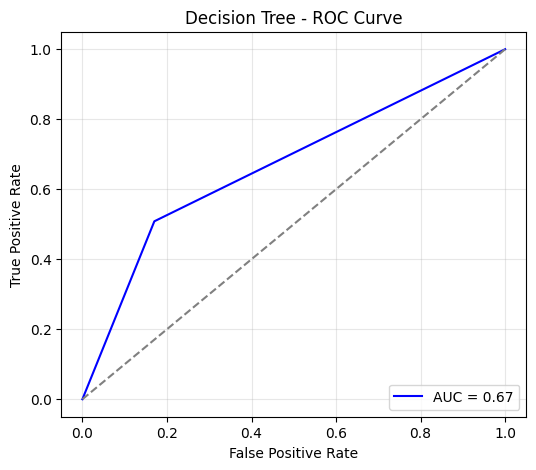


===== SVM =====

Accuracy: 81.68% 

Precision: 0.7706422018348624

Recall: 0.4692737430167598

F1 Score: 0.5833333333333334

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.95      0.88       476
           1       0.77      0.47      0.58       179

    accuracy                           0.82       655
   macro avg       0.80      0.71      0.73       655
weighted avg       0.81      0.82      0.80       655




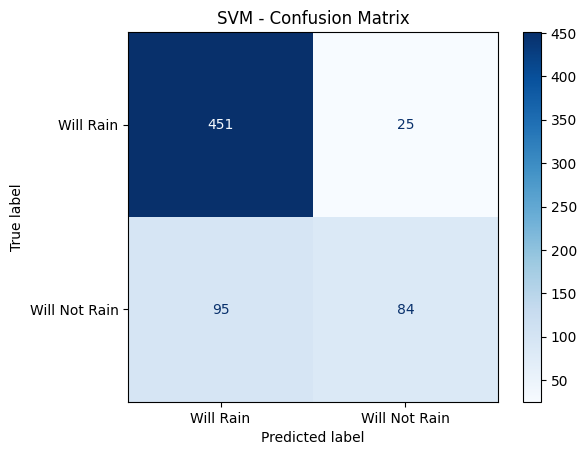

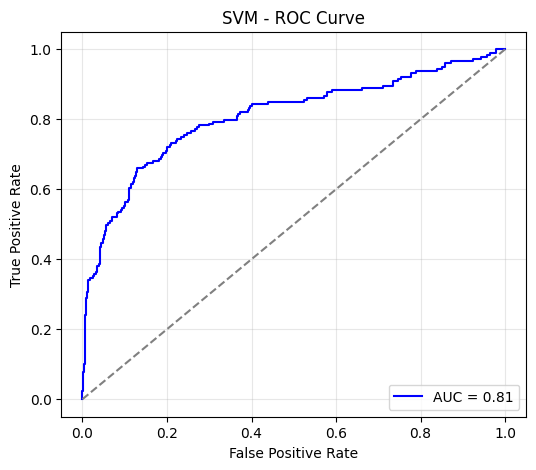


===== Random Forest =====

Accuracy: 81.07% 

Precision: 0.7310924369747899

Recall: 0.4860335195530726

F1 Score: 0.5838926174496645

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       476
           1       0.73      0.49      0.58       179

    accuracy                           0.81       655
   macro avg       0.78      0.71      0.73       655
weighted avg       0.80      0.81      0.80       655




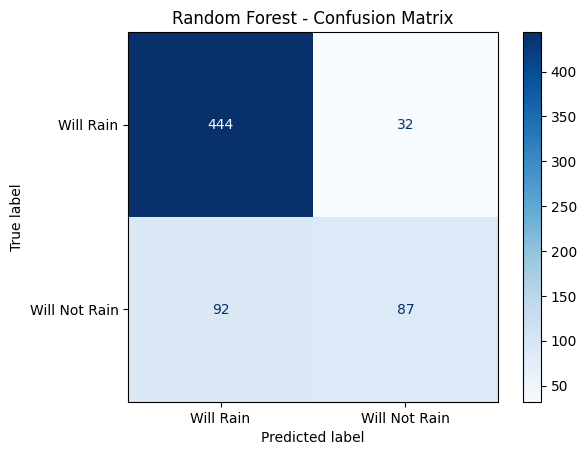

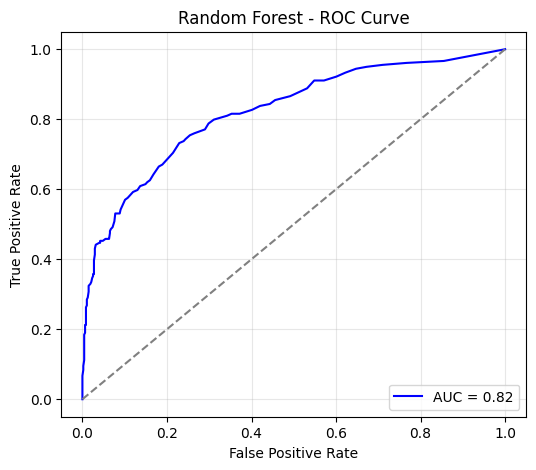


===== Gradient Boosting Classifier =====

Accuracy: 82.75% 

Precision: 0.775

Recall: 0.5195530726256983

F1 Score: 0.6220735785953178

Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       476
           1       0.78      0.52      0.62       179

    accuracy                           0.83       655
   macro avg       0.81      0.73      0.76       655
weighted avg       0.82      0.83      0.82       655




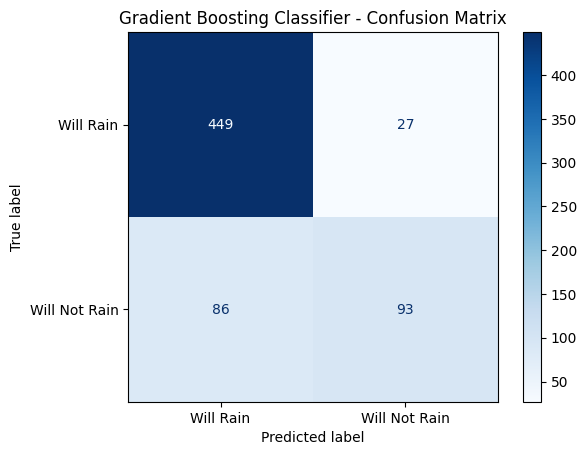

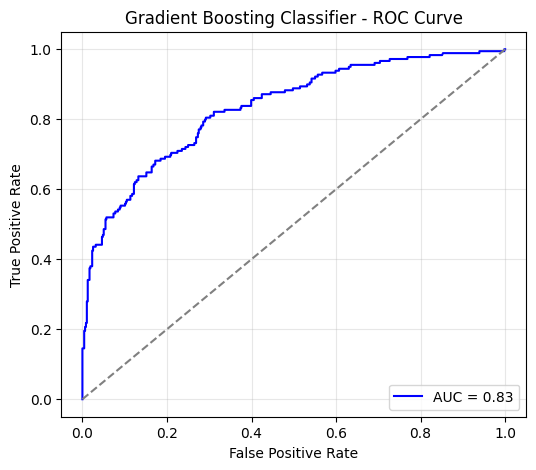

In [182]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    show_result(model_name, model, y_test, y_pred)

In [183]:
grid_parameters = {
    "n_estimators": [50, 100, 200], 
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    grid_parameters,
    cv=5,
    n_jobs=-1,
    scoring="accuracy"
)

grid_search.fit(X_train, y_train)

best_parameter = grid_search.best_params_
best_score = (grid_search.best_score_ * 100)
print("Best Parameter: ", best_parameter)
print(f"Best Accuracy: {best_score:.2f}%")

Best Parameter:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 84.56%


In [184]:
best_rf = grid_search.best_estimator_
joblib.dump(best_rf, "Final_RF_Model.pkl")
joblib.dump(scaler, "Scaler.pkl")
print("Model and Scaler Saved Successfully!")

Model and Scaler Saved Successfully!


In [185]:
loaded_model = joblib.load("Final_RF_Model.pkl")
loaded_model_prediction = loaded_model.predict(X_test)
print(f"Prediction from loaded model: {loaded_model_prediction[:5]}")

Prediction from loaded model: [0 1 0 1 1]
